In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Déf des paramètres

d = 2 # Dim de l'espace dans lequel vivent les courbes
n = 100 # Nb d'éléments des courbes
r = n # Nb de vecteurs dans la famille gén

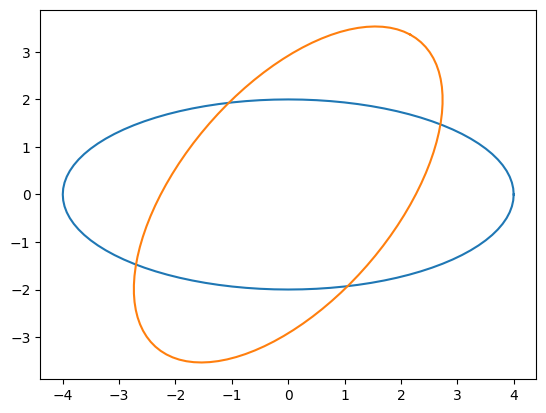

In [9]:
# Fonction coord ellipse

def ellipse(a,b,rot):
    theta = np.linspace(0,2*np.pi,n+1)
    x = a*np.cos(theta)*np.cos(rot) - b*np.sin(theta)*np.sin(rot)
    y = a*np.cos(theta)*np.sin(rot) + b*np.sin(theta)*np.cos(rot)
    return x,y

x1,x2 = ellipse(4,2,0) 
y1,y2 = ellipse(4,2,1)

x1_vect, x2_vect = x1[:-1, np.newaxis], x2[:-1, np.newaxis]
y1_vect, y2_vect = y1[:-1, np.newaxis], y2[:-1, np.newaxis]

plt.figure()
plt.plot(x1,x2)
plt.plot(y1,y2)
plt.show()

In [10]:
# Déf des déformations 

def noyau_gauss(sigma,x_arr,y_arr):
    '''
    Args : 
    sigma : réel > 0
    x_arr : tableau de taille (n1,d) : liste de n1 vecteurs de R^d : (x_1, ..., x_n1)
    y_arr : tableau de taille (n2,d) : liste de n2 vecteurs de R^d : (y_1, ..., y_n2)
    
    Retour : matrice de taille (n1,n2) des noyaux gaussiens des paires de vecteurs de x_arr et y_arr : K_sigma(x_i, y_j)
    '''
    distances_carre = np.sum((x_arr[:, np.newaxis] - y_arr)**2, axis=2)
    return np.exp(-distances_carre / (2*sigma**2))
    
def champ_vect(sigma,a_arr,x_arr,z_arr):
    '''
    Args :
    sigma : réel > 0
    a_arr : tableau de taille (r,d) : liste de r vect de R^d formant de la famille gén du champ
    x_arr : tableau de taille (n,d) : liste de n vect de R^d, variables du champ : (x_1, ..., x_n)
    z_arr : tableau de taille (r,d) : liste de r vect de R^d formant les points de base du champ

    Retour : tableau de taille (n,d) : liste des évals du champ en chacun des vect de x_arr : (v(x_1), ..., v(x_n))
    '''
    noyaux = noyau_gauss(sigma,x_arr,z_arr)
    return noyaux@a_arr

def deform(sigma,a_arr,x_arr,z_arr):
    '''
    Args : idem que fonction précédente

    Retour : tableau de taille (n,d) : liste des évals de la déform en chacun des vect de x_arr : (phi(x_1), ..., phi(x_n))
    '''
    return x_arr + champ_vect(sigma,a_arr,x_arr,z_arr)

sigma = 1
a_arr = np.array([[1,0],[0,1]])
z_arr = np.array([[0,0],[1,1]])
x_arr = np.array([[1,0]])
y_arr = np.array([[0,0],[1,1],[2,2]])

deform(sigma,a_arr,x_arr,z_arr)

array([[1.60653066, 0.60653066]])

In [11]:
# Calcul de la déformation minimisant l'énergie

def fam_gen_opti(lambd,sigma,z_arr,courbe1,courbe2):
    '''
    Args :
    lambd, sigma : réels > 0
    z_arr : tableau de taille (r,d) : liste de r vect de R^d formant les points de base du champ
    courbe1 : tableau de taille (n,d) : liste des n points de R^d formant la courbe 1
    courbe2 : tableau de taille (n,d) : liste des n points de R^d formant la courbe 2

    Retour : tableau de taille (r,d) : liste des r vect de R^d formant la famille gén qui minimise l'énergie
    '''
    K = noyau_gauss(sigma,courbe1,z_arr)
    M = np.eye(n) + 2*lambd*K@K
    return 2*lambd*np.linalg.inv(M)@K@(courbe2 - courbe1)

def deform_opti(lambd,sigma,x_arr,z_arr,courbe1,courbe2):
    '''
    Args : idem que fonction précédente

    Retour : tableau de taille (n,d) : liste des évals de la déform minimisant l'énergie en chacun des vect de x_arr
    '''
    a_arr = fam_gen_opti(lambd,sigma,z_arr,courbe1,courbe2)
    return deform(sigma,a_arr,x_arr,z_arr)

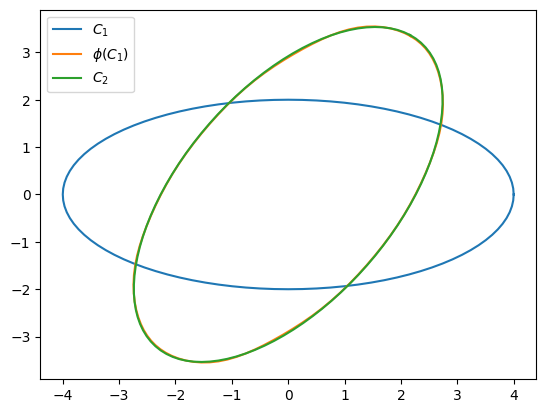

In [12]:
# Plot de l'appariement 

def courbe_deform_plot(lambd,sigma,z_arr,courbe1,courbe2):
    '''
    Args : idem que fonction précédente

    Retour : 2 tableaux de taille (n,1) : listes des abscisses et ordonnées de la courbe déformée
    '''
    courbe1_deform = deform_opti(lambd,sigma,courbe1,z_arr,courbe1,courbe2)
    courbe1_deform = np.vstack([courbe1_deform,courbe1_deform[0]])
    return courbe1_deform[:,0], courbe1_deform[:,1]

# Déf des paramètres

lambd = 1
sigma = 1

courbe1 = np.concatenate((x1_vect,x2_vect), axis=1)
courbe2 = np.concatenate((y1_vect,y2_vect), axis=1)
z_arr = courbe1

# Plot 

x1_deform, x2_deform = courbe_deform_plot(lambd,sigma,z_arr,courbe1,courbe2)

plt.figure()
plt.plot(x1,x2, label=r'$C_1$')
plt.plot(x1_deform,x2_deform, label=r'$\phi(C_1)$')
plt.plot(y1,y2, label=r'$C_2$')
plt.legend()
plt.show()

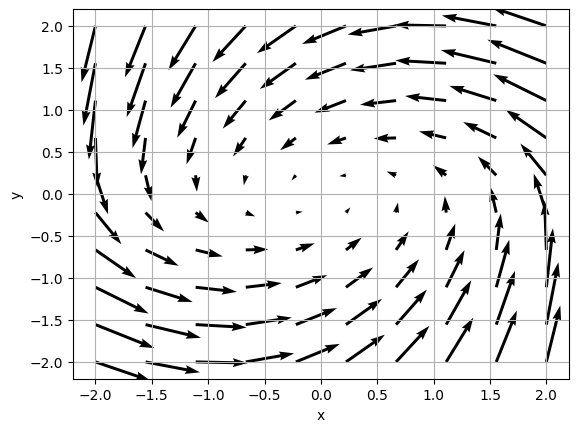

In [13]:
# Plot du champ de vect

#Déf des paramètres du champ de vect

lambd = 1
sigma = 1

courbe1 = np.concatenate((x1_vect,x2_vect), axis=1)
courbe2 = np.concatenate((y1_vect,y2_vect), axis=1)
z_arr = courbe1

# Déf du champ de vect optimal

a_arr_opti = fam_gen_opti(lambd,sigma,z_arr,courbe1,courbe2)

def champ_vect_opti(x_arr, y_arr):
    '''
    Args :
    x_arr : tableau 2D, abscisses du meshgrid
    y_arr : tableau 2D, ordonnées du meshgrid

    Retour : 
    U : tableau 2D, abscisses des évalusations du champ en chaque vect
    V : tableau 2D, ordonnées des évalusations du champ en chaque vect
    '''
    x_arr = x_arr.flatten()[:, np.newaxis]
    y_arr = y_arr.flatten()[:, np.newaxis]
    
    res = champ_vect(sigma, a_arr_opti, np.concatenate([x_arr, y_arr], axis=1), z_arr)

    U = res[:, 0].reshape(x_arr.shape)
    V = res[:, 1].reshape(y_arr.shape)
    
    return U, V

# Dés des paramètres du plot

N = 10
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X,Y = np.meshgrid(x, y)
U,V = champ_vect_opti(X,Y)

# Plot

plt.figure()
plt.quiver(X, Y, U, V, scale=20)  # scale ajuste la longueur des vecteurs
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

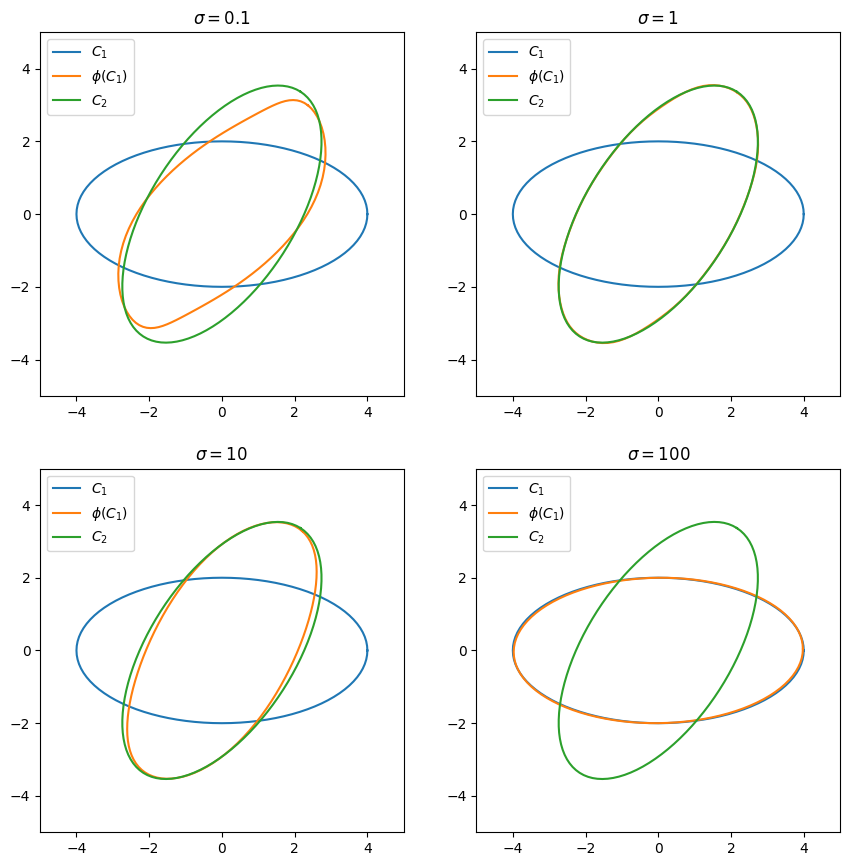

In [14]:
# Plot des appariements pour différentes valeurs de sigma

sigma_liste = [0.1,1,10,100]
lambd = 1

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in range(4):
    row, col = i // 2, i % 2   # Calculer indices de ligne et colomne du subplot
    ax = axes[row, col]  # Accéder au i-ième subplot
    
    sigma = sigma_liste[i]
    x1_deform, x2_deform = courbe_deform_plot(lambd,sigma,z_arr,courbe1,courbe2)

    ax.plot(x1,x2, label=r'$C_1$')
    ax.plot(x1_deform,x2_deform, label=r'$\phi(C_1)$')
    ax.plot(y1,y2, label=r'$C_2$')
    ax.legend()
    
    ax.set_title(rf'$\sigma = {sigma}$')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

plt.show()

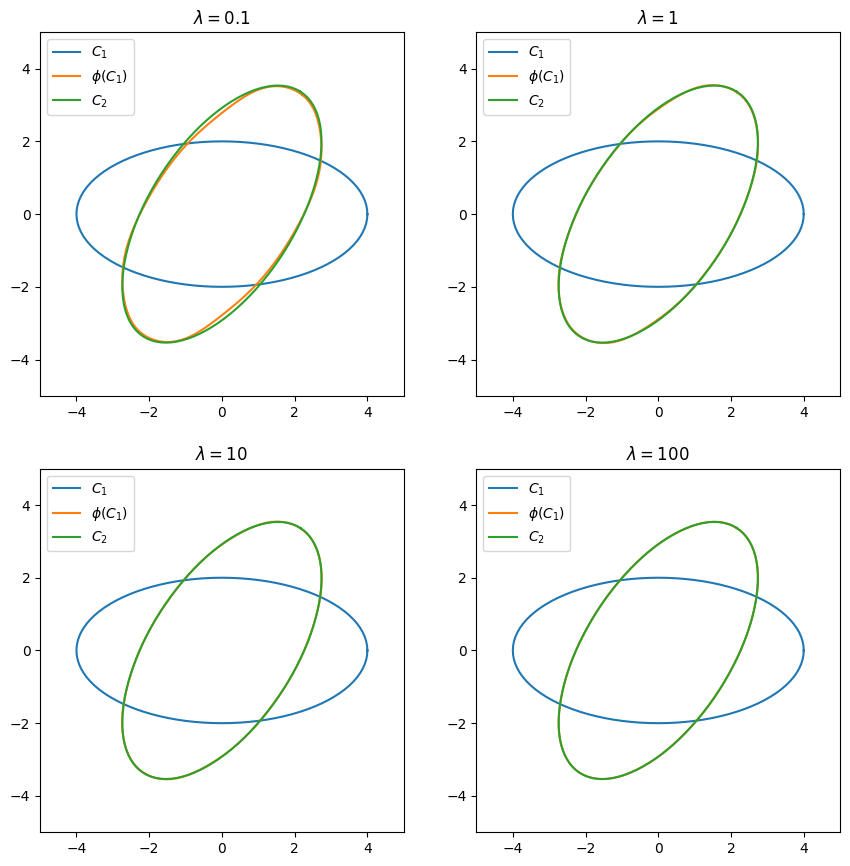

In [15]:
# Plot des appariements pour différentes valeurs de lambda 

sigma = 1
lambd_liste = [0.1,1,10,100]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in range(4):
    row, col = i // 2, i % 2   # Calculer indices de ligne et colomne du subplot
    ax = axes[row, col]  # Accéder au i-ième subplot
    
    lambd = lambd_liste[i]
    x1_deform, x2_deform = courbe_deform_plot(lambd,sigma,z_arr,courbe1,courbe2)
    
    ax.plot(x1,x2, label=r'$C_1$')
    ax.plot(x1_deform,x2_deform, label=r'$\phi(C_1)$')
    ax.plot(y1,y2, label=r'$C_2$')
    ax.legend()
    
    ax.set_title(rf'$\lambda = {lambd}$')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

plt.show()